In [291]:
%run carbon_tracker.py

In [339]:
import pandas as pd  
import numpy as np  

import matplotlib.pyplot as plt  # Bibliothèque pour créer des graphiques et visualiser les données
import seaborn as sns  # Bibliothèque basée sur Matplotlib, optimisée pour la visualisation statistique

from sklearn.preprocessing import LabelEncoder  # Encode les variables catégoriques en valeurs numériques
from sklearn.preprocessing import StandardScaler  # Normalise les données en leur appliquant une mise à l'échelle standard

from sklearn.ensemble import RandomForestClassifier  # Modèle d'apprentissage supervisé basé sur un ensemble d'arbres de décision

from sklearn.model_selection import train_test_split  # Fonction pour diviser les données en ensembles d'entraînement et de test
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score  # Métriques pour évaluer les performances des modèles

from sklearn.model_selection import GridSearchCV  # Recherche des meilleurs hyperparamètres d’un modèle par validation croisée
from sklearn.model_selection import cross_val_score  # Évalue la performance d’un modèle par validation croisée
from sklearn.model_selection import learning_curve

from sklearn.svm import SVC  # Modèle de classification basé sur les machines à vecteurs de support (Support Vector Machine)
from sklearn.linear_model import LogisticRegression  # Modèle de régression logistique pour la classification binaire ou multiclasse


<span style="font-size: 32px; font-weight: bold;">Data Exploration</span>



In [293]:
update_project_name("Pre-processing")

[codecarbon ERROR @ 11:59:44] You first need to start the tracker.


<span style="font-size: 16px; font-weight: bold;">Loading csv file</span>


In [294]:
df = pd.read_csv("final_depression_dataset_1.csv")

<span style="font-size: 16px; font-weight: bold;">Showing th first lines of the csv file</span>


In [295]:
df.head()

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Pooja,Female,37,Ghaziabad,Working Professional,Teacher,NaN,2.0,NaN,NaN,4.0,7-8 hours,Moderate,MA,No,6,2,No,No
1,Reyansh,Male,60,Kalyan,Working Professional,Financial Analyst,NaN,4.0,NaN,NaN,3.0,5-6 hours,Unhealthy,B.Com,Yes,0,4,Yes,No
2,Manvi,Female,42,Bhopal,Working Professional,Teacher,NaN,2.0,NaN,NaN,3.0,5-6 hours,Moderate,M.Com,No,0,2,No,No
3,Isha,Female,44,Thane,Working Professional,Teacher,NaN,3.0,NaN,NaN,5.0,7-8 hours,Healthy,MD,Yes,1,2,Yes,No
4,Aarav,Male,48,Indore,Working Professional,UX/UI Designer,NaN,4.0,NaN,NaN,3.0,7-8 hours,Moderate,BE,Yes,6,5,Yes,No


<span style="font-size: 16px; font-weight: bold;">Describe the csv file</span>


In [296]:
print(df.describe())  # Affiche des statistiques descriptives sur les colonnes numériques du DataFrame `df`


               Age  Academic Pressure  Work Pressure        CGPA  \
count  2556.000000         502.000000    2054.000000  502.000000   
mean     39.043036           3.003984       3.021908    7.567809   
std      12.260596           1.390007       1.417312    1.465367   
min      18.000000           1.000000       1.000000    5.030000   
25%      28.000000           2.000000       2.000000    6.210000   
50%      39.000000           3.000000       3.000000    7.605000   
75%      50.000000           4.000000       4.000000    8.825000   
max      60.000000           5.000000       5.000000   10.000000   

       Study Satisfaction  Job Satisfaction  Work/Study Hours  \
count          502.000000       2054.000000       2556.000000   
mean             3.075697          3.015093          6.023865   
std              1.373490          1.418432          3.771743   
min              1.000000          1.000000          0.000000   
25%              2.000000          2.000000          3.000000 

<span style="font-size: 16px; font-weight: bold;">number of rows in the  csv file</span>


In [297]:
print(len(df))

2556


<span style="font-size: 16px; font-weight: bold;">Empty rows</span>


In [298]:
empty_rows = df.isnull().all(axis=1).sum()

print(empty_rows)  # Affiche le nombre total de lignes complètement vides

# Explication détaillée :

# 1. df.isnull()
#    - Crée un DataFrame de la même taille que `df`, où chaque valeur est :
#      - True si la cellule contient NaN (valeur manquante)
#      - False sinon

# 2. .all(axis=1)
#    - Vérifie si **toutes** les valeurs d’une même ligne sont True (donc NaN).
#    - `axis=1` signifie qu'on applique la vérification **sur les colonnes**, 
#      c'est-à-dire qu'on regarde ligne par ligne si toutes les colonnes sont NaN.
#    - Si une ligne contient au moins une valeur non manquante, `all()` retourne False pour cette ligne.

# 3. .`sum()` compte le nombre de `True`, ce qui revient à compter le nombre de lignes entièrement vides.



0


<span style="font-size: 16px; font-weight: bold;">Negative rows</span>


In [299]:
numeric_columns = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 
                   'Job Satisfaction', 'Study Satisfaction', 'Work/Study Hours', 'Financial Stress']

negative_rows = (df[numeric_columns] < 0).any(axis=1).sum()
#any : Vérifie si au moins une valeur dans une ligne est True (donc négative).

print(negative_rows)


0


<span style="font-size: 16px; font-weight: bold;">Data types</span>


In [300]:
print(df.dtypes)

Name                                      object
Gender                                    object
Age                                        int64
City                                      object
Working Professional or Student           object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                           int64
Financial Stress                           int64
Family History of Mental Illness          object
Depression                                object
dtype: object


<span style="font-size: 16px; font-weight: bold;">Negative values in each columns</span>


In [301]:
print(df.isna().sum())
#df.isna() crée un DataFrame booléen où chaque cellule est True si elle est NaN, False sinon.

Name                                        0
Gender                                      0
Age                                         0
City                                        0
Working Professional or Student             0
Profession                                673
Academic Pressure                        2054
Work Pressure                             502
CGPA                                     2054
Study Satisfaction                       2054
Job Satisfaction                          502
Sleep Duration                              0
Dietary Habits                              0
Degree                                      0
Have you ever had suicidal thoughts ?       0
Work/Study Hours                            0
Financial Stress                            0
Family History of Mental Illness            0
Depression                                  0
dtype: int64


<span style="font-size: 16px; font-weight: bold;">Unique values for each column</span>


In [302]:
print(df['Gender'].unique())

['Female' 'Male']


In [303]:
print(df['Age'].unique())

print()

print(df['Age'].max())
print(df['Age'].min())

[37 60 42 44 48 30 56 35 21 57 54 51 18 31 28 58 47 50 46 38 25 45 23 53
 19 34 49 20 43 22 33 36 24 41 29 27 52 26 59 55 40 32 39]

60
18


In [304]:
print(df['Financial Stress'].unique())


[2 4 5 3 1]


In [305]:
# Afficher les valeurs uniques triées par ordre croissant
print(sorted(df['Work/Study Hours'].unique()))



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [306]:
print(df['Degree'].unique())


['MA' 'B.Com' 'M.Com' 'MD' 'BE' 'MCA' 'BA' 'LLM' 'BCA' 'Class 12' 'B.Ed'
 'M.Tech' 'LLB' 'B.Arch' 'ME' 'MBA' 'M.Pharm' 'MBBS' 'PhD' 'BSc' 'MSc'
 'MHM' 'BBA' 'BHM' 'B.Tech' 'M.Ed' 'B.Pharm']


In [307]:
print(df['Dietary Habits'].unique())


['Moderate' 'Unhealthy' 'Healthy']


In [308]:
print(df['Depression'].unique())


['No' 'Yes']


In [309]:
print(df['Family History of Mental Illness'].unique())

['No' 'Yes']


In [310]:
print(df['Sleep Duration'].unique())

['7-8 hours' '5-6 hours' 'More than 8 hours' 'Less than 5 hours']


In [311]:
# Dictionnaire de conversion des valeurs textuelles en nombres
sleep_mapping = {
    'More than 8 hours': 9,  
    '5-6 hours': 5.5,        
    'Less than 5 hours': 4, 
    '7-8 hours': 7.5,        
    '6-7 hours': 6.5         
}

df['Sleep Duration'] = df['Sleep Duration'].map(sleep_mapping)  
#.map(sleep_mapping) remplace chaque valeur de la colonne "Sleep Duration" par sa correspondance dans le dictionnaire.

# Vérification des valeurs uniques après conversion
print(sorted(df['Sleep Duration'].unique()))


[4.0, 5.5, 7.5, 9.0]


In [312]:
print(df['Working Professional or Student'].unique())	

['Working Professional' 'Student']


In [313]:
#Cumulative Grade Point Average(CGPA)
print(df['CGPA'].min())	
print(df['CGPA'].max())	

# Compter les valeurs de CGPA < 5
count_less_than_5 = (df['CGPA'] < 5).sum()
print()
print(f"Nombre de CGPA < 5 : {count_less_than_5}") # f-string peret dinserer des variables dans des chaines
# Compter les valeurs de CGPA > 5
count_greater_than_5 = (df['CGPA'] > 5).sum()
print(f"Nombre de CGPA > 5 : {count_greater_than_5}")

5.03
10.0

Nombre de CGPA < 5 : 0
Nombre de CGPA > 5 : 502


In [314]:
print(sorted(df['Academic Pressure'].unique()))

[nan, 1.0, 2.0, 3.0, 4.0, 5.0]


In [315]:
print(sorted(df['Work Pressure'].unique()))	

[1.0, 2.0, 3.0, 4.0, nan, 5.0]


In [316]:
print(sorted(df['Study Satisfaction'].unique()))	

[nan, 1.0, 2.0, 3.0, 4.0, 5.0]


In [317]:
print(sorted(df['Job Satisfaction'].unique()))

[1.0, 2.0, 3.0, 4.0, 5.0, nan]


In [318]:
# Fusion des colonnes en remplissant les valeurs manquantes
df['Pressure'] = df['Academic Pressure'].fillna(df['Work Pressure'])
#df['Pressure'] = df['Academic Pressure'].fillna(df['Work Pressure'])
#Si une valeur de "Academic Pressure" est NaN, elle sera remplacée par la valeur correspondante de "Work Pressure".

# Suppression des anciennes colonnes
df = df.drop(columns=['Academic Pressure', 'Work Pressure'])

df['Satisfaction'] = df['Job Satisfaction'].fillna(df['Study Satisfaction'])
df = df.drop(columns=['Job Satisfaction', 'Study Satisfaction'])


In [319]:
df = df.drop('Profession', axis=1)
df = df.drop('Name', axis=1)
df = df.drop('CGPA', axis=1)

In [320]:
print(df.isna().sum())

Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
Pressure                                 0
Satisfaction                             0
dtype: int64


<span style="font-size: 16px; font-weight: bold;">Standardiser les données</span>


In [321]:
colonnes_numeriques = ['Age', 'Pressure', 'Satisfaction', 'Work/Study Hours', 'Financial Stress']

colonnes_categorielles = ['Gender', 'City', 'Working Professional or Student', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness', 'Depression']


In [322]:
# Créer une instance de LabelEncoder
le = LabelEncoder()

# Appliquer le LabelEncoder à chaque colonne catégorielle
for col in colonnes_categorielles:
    df[col] = le.fit_transform(df[col])

    #fit() : Cette méthode ajuste l'encodeur aux données, c'est-à-dire qu'elle apprend tous les labels uniques dans la colonne spécifiée.
    #transform() : Une fois que l'encodeur a appris les labels, transform() remplace chaque label dans la colonne par un numéro


In [323]:
stop_tracker()


<span style="font-size: 32px; font-weight: bold;">Exploration statistique et visualisation des données :</span>


In [324]:
update_project_name("Visualization")

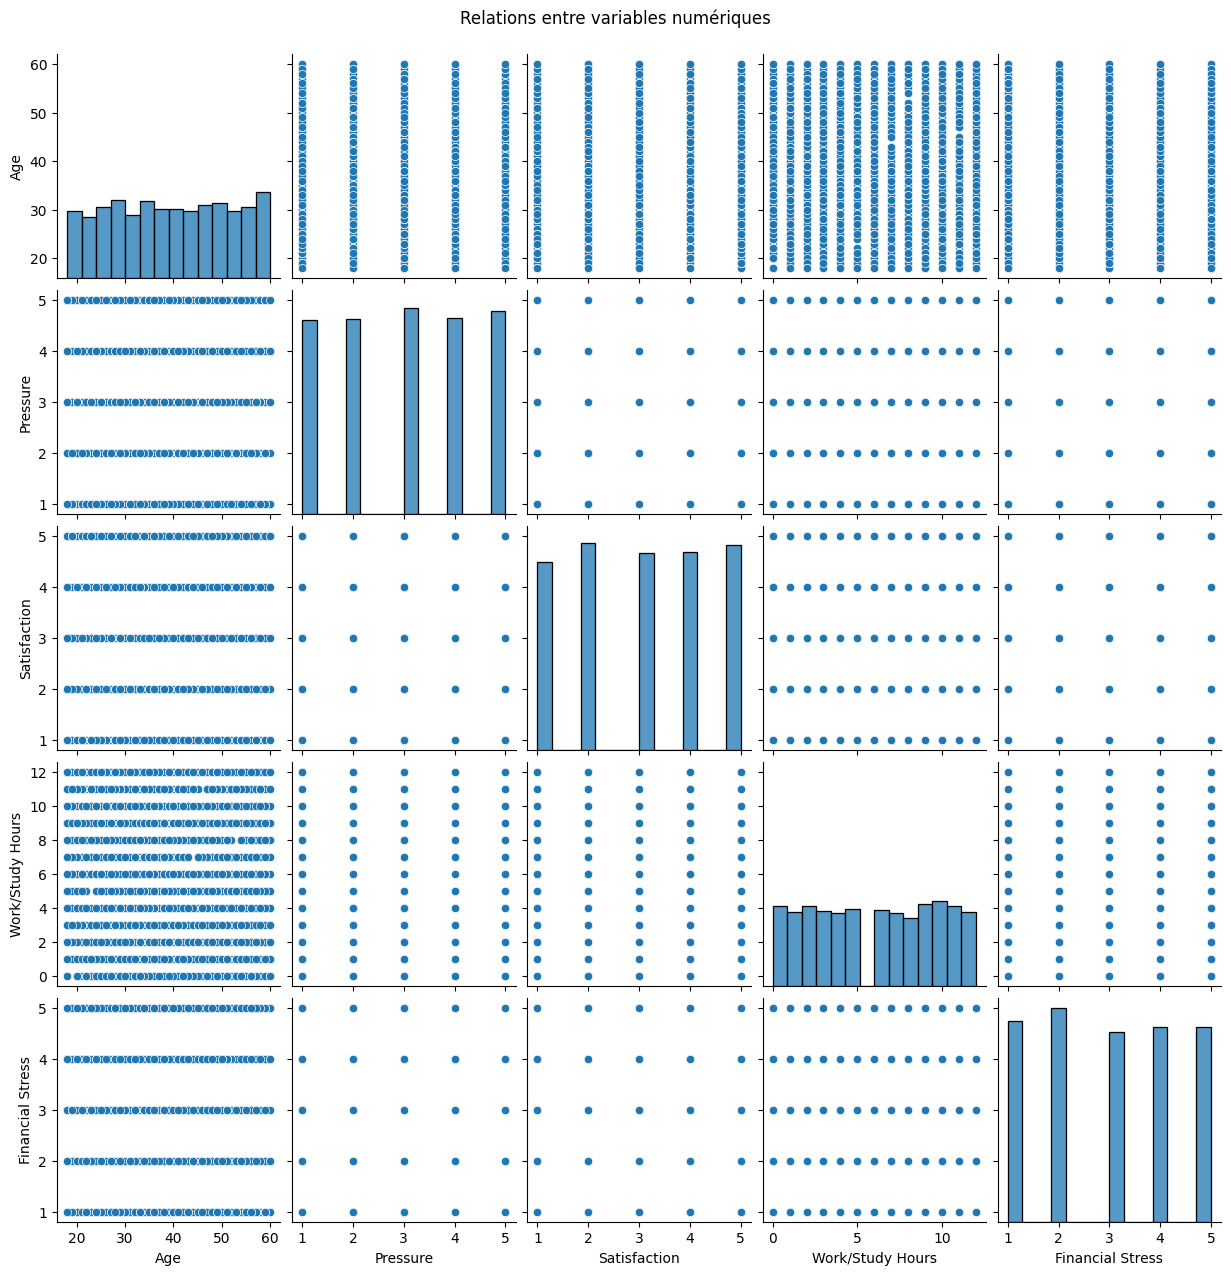

In [325]:
# Créer le pairplot avec les colonnes numériques restantes
sns.pairplot(df[colonnes_numeriques])
plt.suptitle('Relations entre variables numériques', y=1.02)
plt.show()


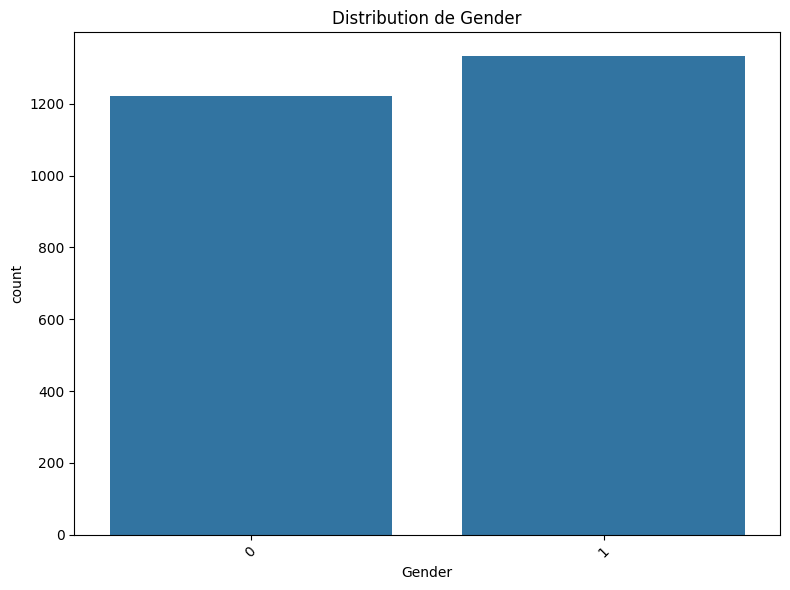

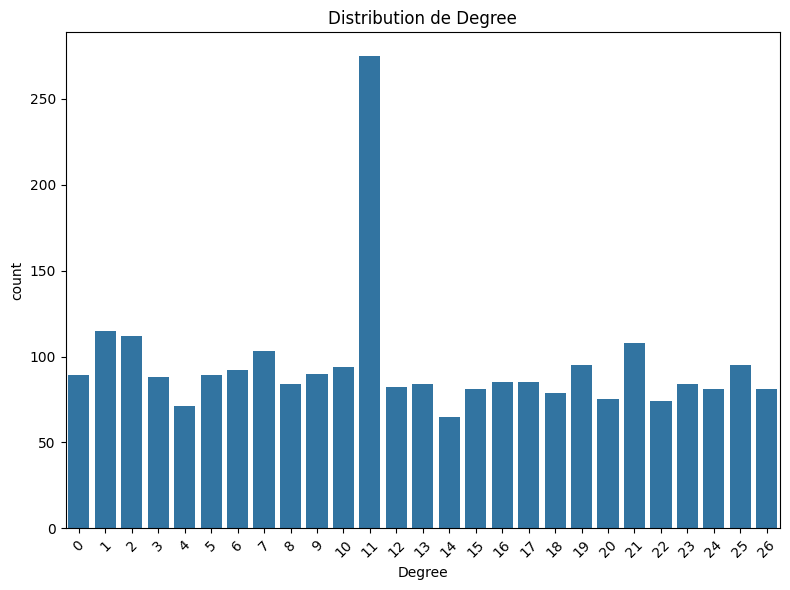

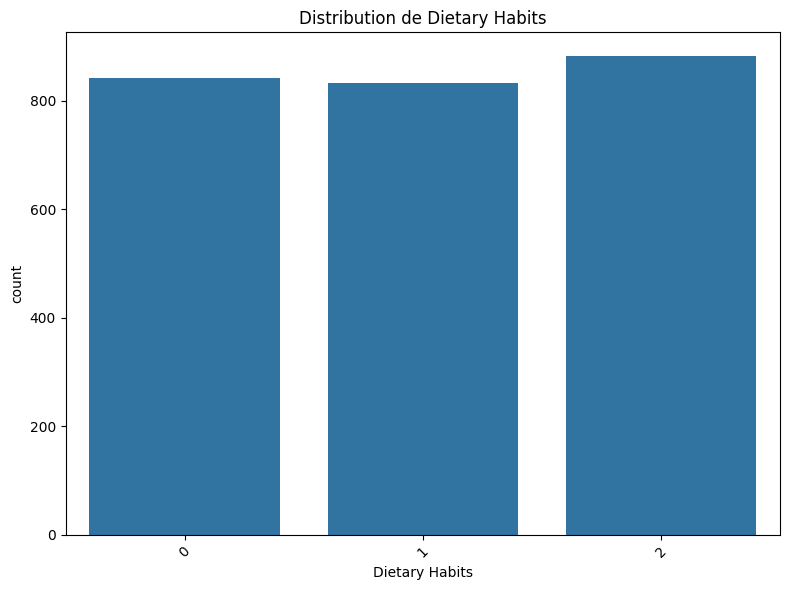

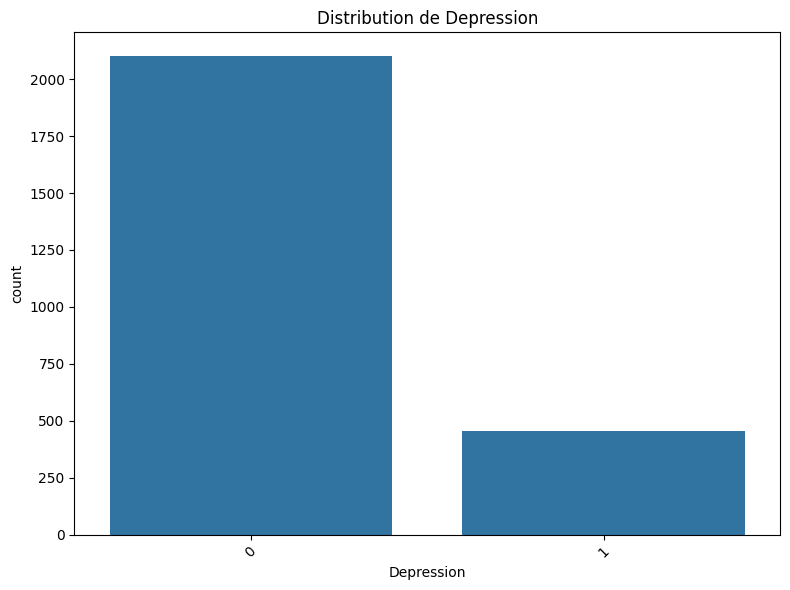

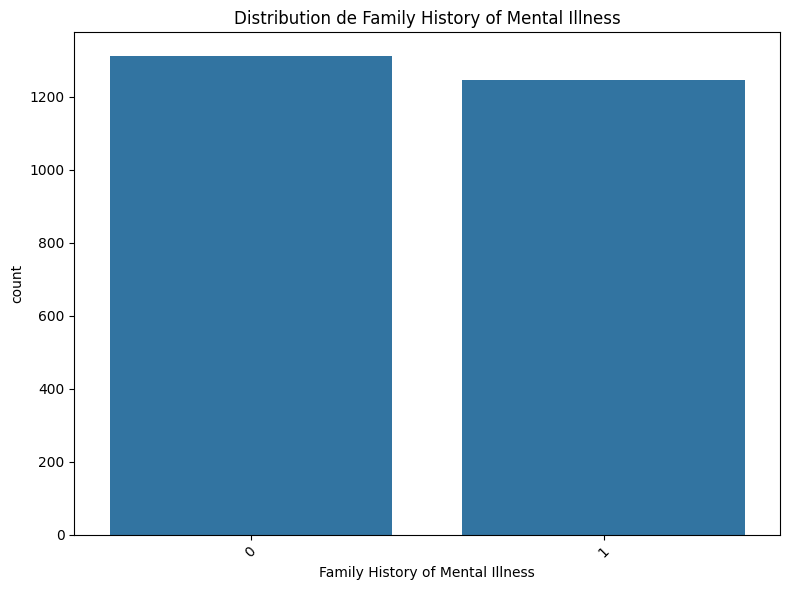

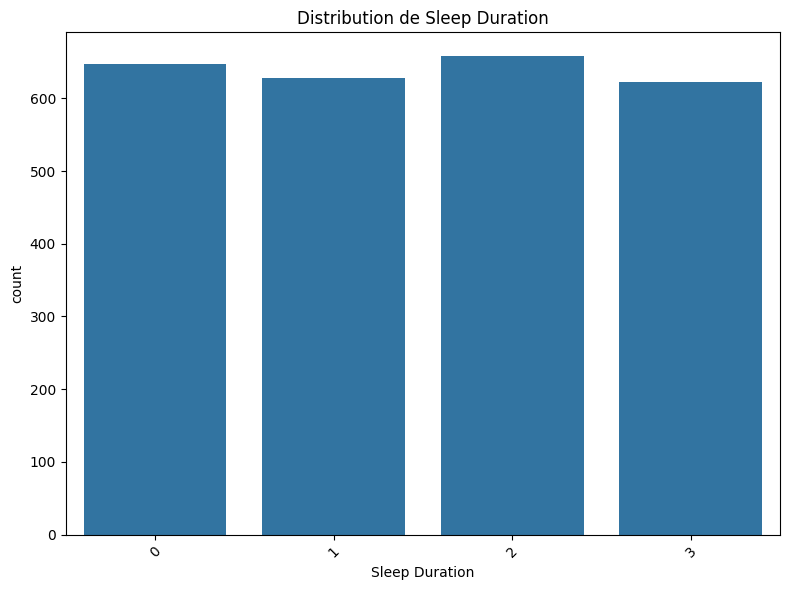

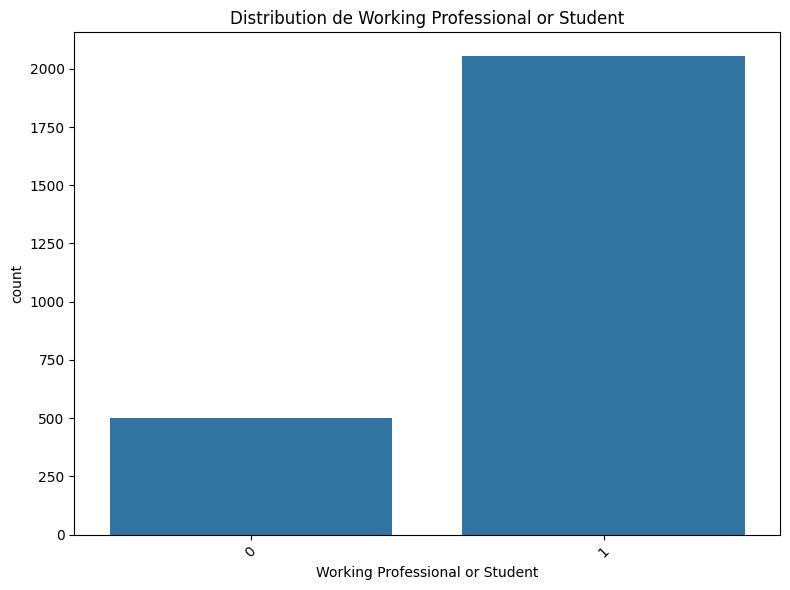

In [326]:
# Analyse des variables catégorielles
categorical_columns = ['Gender', 'Degree', 'Dietary Habits', 'Depression', 
                       'Family History of Mental Illness', 'Sleep Duration', 
                       'Working Professional or Student']

for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=df[col]) 
    #est une fonction de Seaborn qui génère un graphique de type bar plot montrant la fréquence de chaque valeur unique (catégorie) dans une colonne donnée (df[col]).
    plt.title(f'Distribution de {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()## Ajuste l'espace entre les éléments du graphique pour éviter les chevauchements
    plt.show()

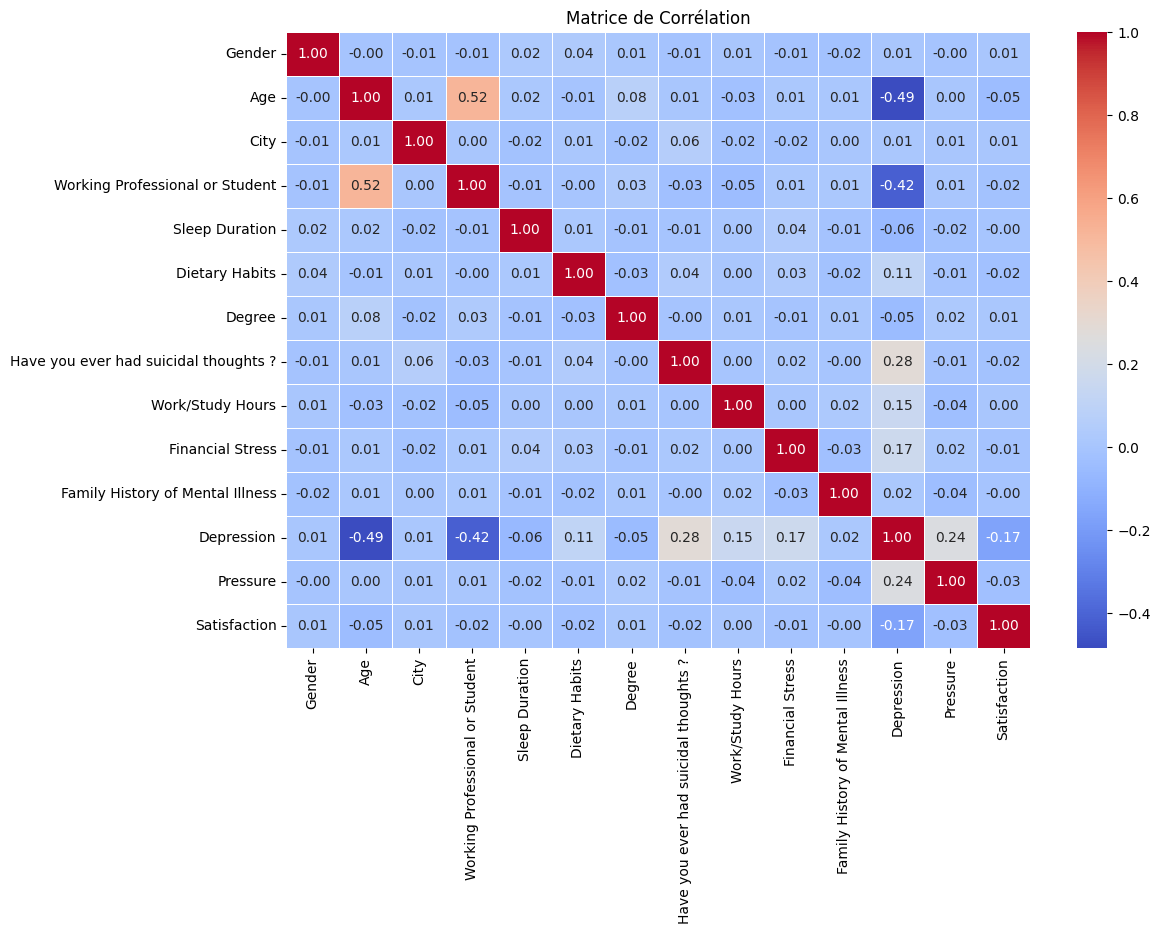

In [327]:
correlation_matrix = df.corr()  # Calcule la matrice de corrélation entre les colonnes numériques du DataFrame
plt.figure(figsize=(12, 8))  # Crée une nouvelle figure avec une taille de 12x8 pouces pour afficher la heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)  
# Crée une heatmap de la matrice de corrélation
# annot=True : Affiche les valeurs numériques sur chaque case de la heatmap
# cmap='coolwarm' : Utilise une palette de couleurs allant du bleu (froid) au rouge (chaud)
# fmt='.2f' : Affiche les valeurs avec 2 décimales
# linewidths=0.5 : Définit l'épaisseur des lignes séparant les cases de la heatmap
plt.title('Matrice de Corrélation')  # Ajoute un titre au graphique
plt.show()  # Affiche la heatmap



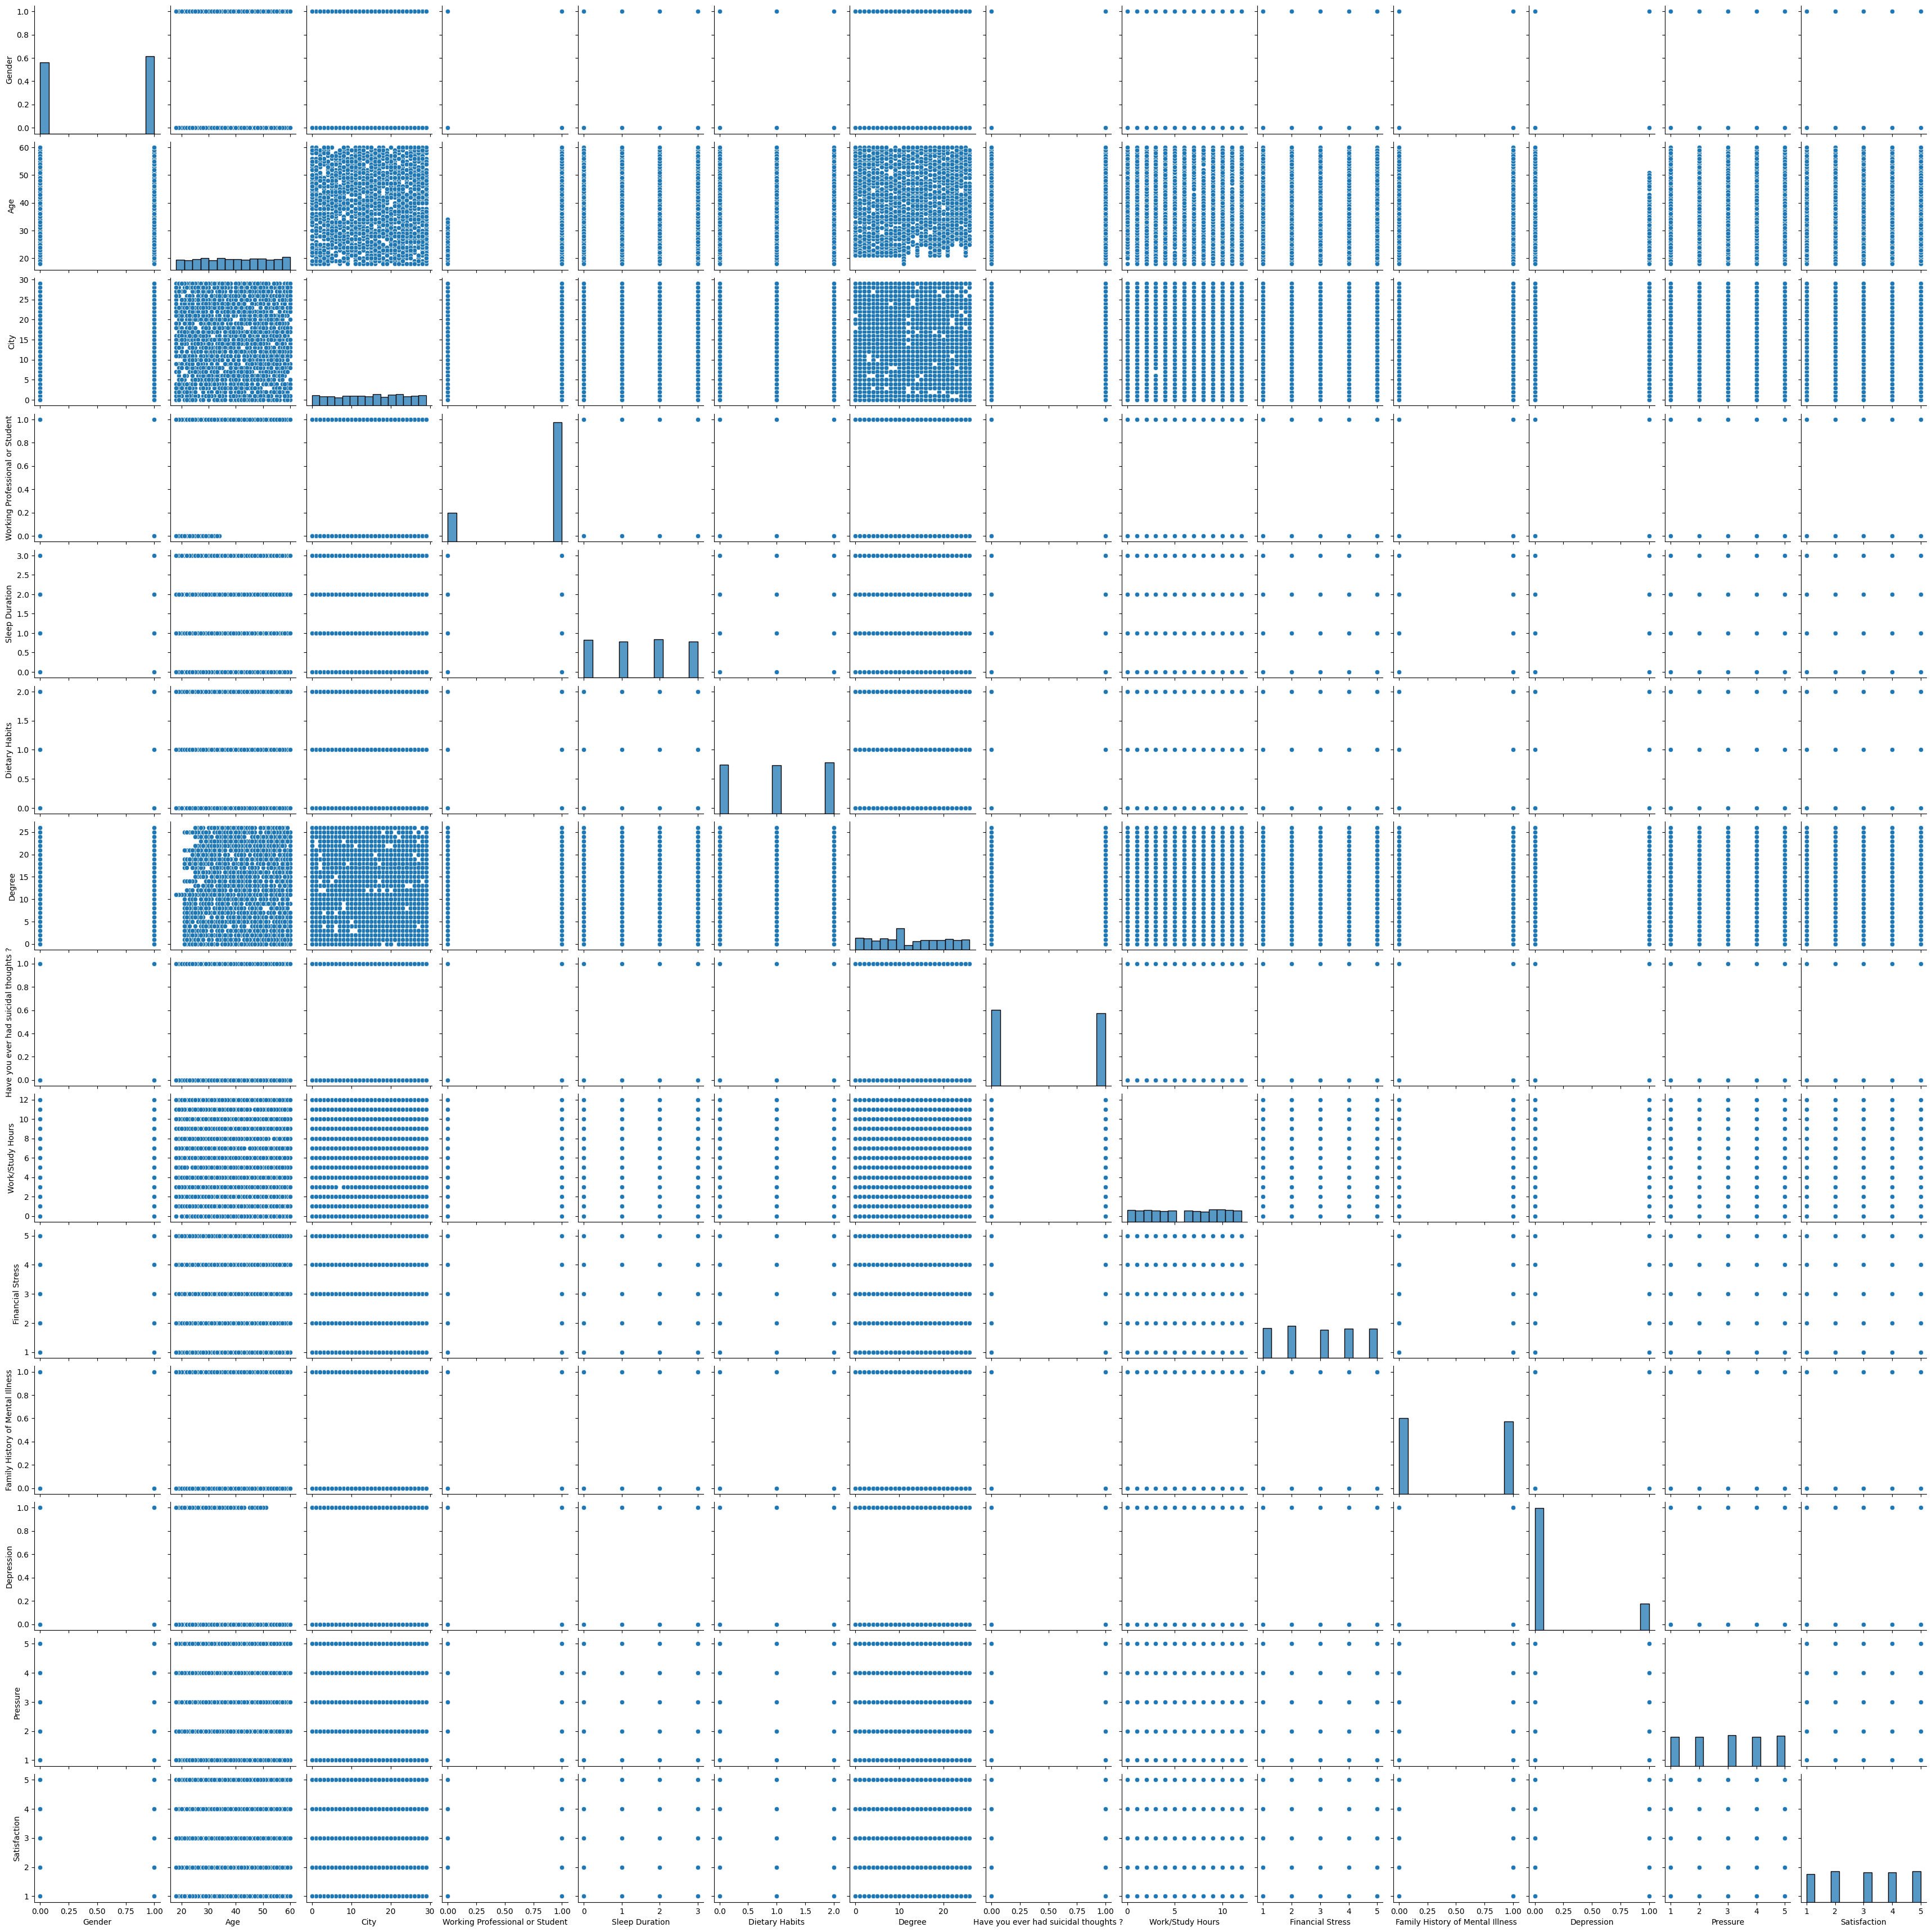

In [328]:
# Créez le pairplot en spécifiant le DataFrame
sns.pairplot(df)
plt.show()

In [329]:
stop_tracker()

In [330]:
df.head()

,Gender,Age,City,Working Professional or Student,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Pressure,Satisfaction
0,0,37,7,1,2,1,18,0,6,2,0,0,2.0,4.0
1,1,60,11,1,1,2,1,1,0,4,1,0,4.0,3.0
2,0,42,3,1,1,1,14,0,0,2,0,0,2.0,3.0
3,0,44,25,1,2,0,22,1,1,2,1,0,3.0,5.0
4,1,48,9,1,2,1,8,1,6,5,1,0,4.0,3.0


### Modèle

In [331]:
scaler = StandardScaler()
# df[colonnes_numeriques] = scaler.fit_transform(df[colonnes_numeriques])
# Sélection des colonnes numériques, en excluant 'Depression'
colonnes_numeriques = df.select_dtypes(include=['number']).columns.difference(['Depression'])

# Appliquer le StandardScaler aux colonnes numériques
df[colonnes_numeriques] = scaler.fit_transform(df[colonnes_numeriques])

In [332]:
update_project_name("Modèle")

In [333]:
df

,Gender,Age,City,Working Professional or Student,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Pressure,Satisfaction
0,-1.044003,-0.166667,-0.901687,0.494369,0.456773,-0.019059,0.716597,-0.977560,-0.006329,-0.684473,-0.974503,0,-0.721512,0.690376
1,0.957851,1.709629,-0.438452,0.494369,-0.439934,1.198783,-1.512292,1.022955,-1.597416,0.728704,1.026164,0,0.695457,-0.019154
2,-1.044003,0.241223,-1.364923,0.494369,-0.439934,-0.019059,0.192153,-0.977560,-1.597416,-0.684473,-0.974503,0,-0.721512,-0.019154
3,-1.044003,0.404380,1.182873,0.494369,0.456773,-1.236900,1.241042,1.022955,-1.332235,-0.684473,1.026164,0,-0.013028,1.399907
4,0.957851,0.730692,-0.670069,0.494369,0.456773,-0.019059,-0.594514,1.022955,-0.006329,1.435293,1.026164,0,0.695457,-0.019154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,0.957851,-1.145604,-1.480732,0.494369,-0.439934,-1.236900,-0.856736,1.022955,1.584759,0.022115,1.026164,0,-1.429997,1.399907
2552,-1.044003,-1.308760,0.719637,0.494369,-1.336641,-0.019059,0.716597,1.022955,0.524034,0.022115,-0.974503,1,-0.013028,-1.438215
2553,-1.044003,-1.227182,0.951255,0.494369,-1.336641,-0.019059,-0.987848,1.022955,-0.536691,0.728704,-0.974503,0,-1.429997,0.690376
2554,-1.044003,1.383316,-1.480732,0.494369,0.456773,-1.236900,-0.856736,-0.977560,-0.536691,1.435293,1.026164,0,-0.721512,-0.019154


In [334]:

# Sélection des variables explicatives et de la variable cible
X = df.drop('Depression', axis=1)
y = df['Depression']

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisation et entraînement du modèle de régression logistique
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Rapport de classification
print(classification_report(y_test, y_pred))

# Calcul de l'importance des variables
coefficients = model.coef_[0]
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': coefficients})
feature_importance['Importance'] = feature_importance['Importance'].abs()
feature_importance = feature_importance.sort_values('Importance', ascending=False)

print(feature_importance)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       429
           1       0.96      0.93      0.94        83

    accuracy                           0.98       512
   macro avg       0.97      0.96      0.97       512
weighted avg       0.98      0.98      0.98       512

                                  Feature  Importance
1                                     Age    5.924882
7   Have you ever had suicidal thoughts ?    3.796286
11                               Pressure    3.189982
12                           Satisfaction    2.596482
9                        Financial Stress    2.107895
8                        Work/Study Hours    1.802099
3         Working Professional or Student    1.276808
5                          Dietary Habits    1.150287
4                          Sleep Duration    0.989582
10       Family History of Mental Illness    0.852364
6                                  Degree    0.129209
0                        

In [335]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Liste des variables
features = [
    'Age',
    'Have you ever had suicidal thoughts ?',
    'Pressure',
    'Satisfaction',
    'Financial Stress',
    'Work/Study Hours',
    'Working Professional or Student',
    'Dietary Habits',
    'Sleep Duration',
    'Family History of Mental Illness',
    'Degree',
    'Gender'
]

# Sélection des variables explicatives et de la variable cible
X = df[features]
y = df['Depression']

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisation et entraînement du modèle de régression logistique
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Rapport de classification
print(classification_report(y_test, y_pred))

# Précision sur l'ensemble d'entraînement
train_accuracy = model.score(X_train, y_train)
print(f'Précision sur l\'ensemble d\'entraînement : {train_accuracy:.2f}')

# Précision sur l'ensemble de test
test_accuracy = model.score(X_test, y_test)
print(f'Précision sur l\'ensemble de test : {test_accuracy:.2f}')


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       429
           1       0.96      0.93      0.94        83

    accuracy                           0.98       512
   macro avg       0.97      0.96      0.97       512
weighted avg       0.98      0.98      0.98       512

Précision sur l'ensemble d'entraînement : 0.99
Précision sur l'ensemble de test : 0.98


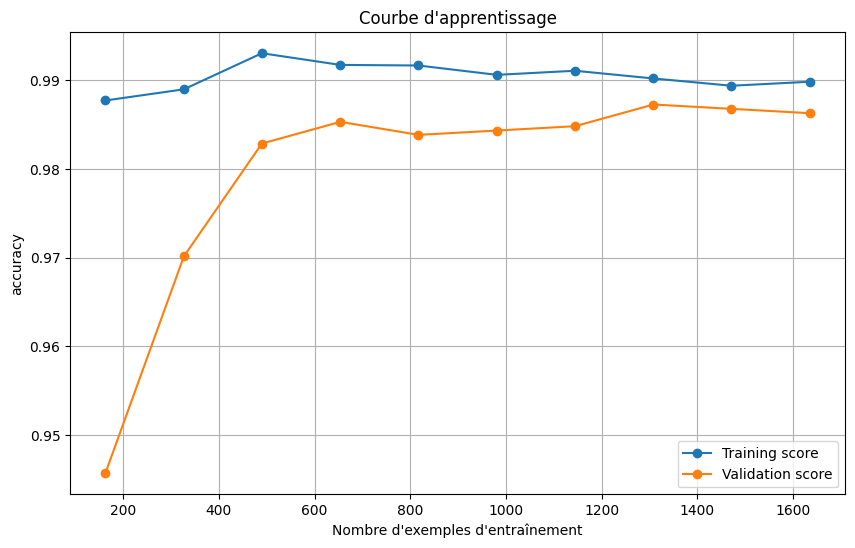

In [338]:
def plot_learning_curve(estimator, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)):
    """
    Trace la courbe d'apprentissage pour un estimateur donné.
    """
    train_sizes, train_scores, valid_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, train_sizes=train_sizes, random_state=20
    )
    
    train_mean = np.mean(train_scores, axis=1)
    valid_mean = np.mean(valid_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='Training score', marker='o')
    plt.plot(train_sizes, valid_mean, label='Validation score', marker='o')
    plt.xlabel('Nombre d\'exemples d\'entraînement')
    plt.ylabel(scoring)
    plt.title('Courbe d\'apprentissage')
    plt.legend()
    plt.grid(True)
    plt.show()


# Tracer la courbe d'apprentissage
plot_learning_curve(model, X_train, y_train, cv=5, scoring='accuracy')


In [337]:
stop_tracker()